# Gemaakt op 14/05/2025 door martijn

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from fpdf import FPDF

In [53]:
from sklearn import tree
import graphviz
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          class_names=class_names,
                          filled=True, rounded=True,
                          special_characters=True)

    graph = graphviz.Source(dot_data)

    graph.render("decision_tree")

    return graph

## Portfolio assignment 19
30 min: Train a random forest to predict one of the categorical columns of your **own** dataset.
- Prepare the data:<br>
    - <b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to:
         - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
         - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html <br>
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a RandomForestClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your random forest model to make predictions for both the train and test set.
<br>

![](https://i.imgur.com/0v1CGNV.png)<br>
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Which number of trees, depth and features did you add per cycle?
- Is the accurracy different? Did you expect this difference?



Findings: ...

In [54]:
games = pd.read_csv("./games.csv")
games['positive_ratio'] = games['positive_ratio'].fillna(games['positive_ratio'].mean())
games['user_reviews'] = games['user_reviews'].fillna(games['user_reviews'].mean())
games['price_final'] = games['price_final'].fillna(games['price_final'].mean())
games['price_original'] = games['price_original'].fillna(games['price_original'].mean())
games['discount'] = games['discount'].fillna(games['discount'].mean())
games_train, games_test = train_test_split(games, test_size=0.3, random_state=42, stratify=games['rating'])
print(games_train.shape, games_test.shape)

(35610, 13) (15262, 13)


ik heb hier de dataset ingeladen, de NaN values gevuld met de mean en de dataset opgesplitst in 2 datasets

## Assumption
zoals eerder al gezegd te hebben heb ik er geen vertrouwen in dat er een correlatie is, maar we zullen het zien.

In [55]:
features = ['positive_ratio', 'user_reviews', "price_final", "price_original", "discount"]
X = games[features]
y = games['rating']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [57]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=5)

In [58]:
def plot_tree_classification(model, features, class_names, output_file='random_forest'):
    if isinstance(model, RandomForestClassifier):
        pdf = FPDF()

        for i, tree_model in enumerate(model.estimators_):
            dot_data = tree.export_graphviz(tree_model, out_file=None,
                                  feature_names=features,
                                  class_names=class_names,
                                  filled=True, rounded=True,
                                  special_characters=True)

            # Turn into graph using graphviz
            graph = graphviz.Source(dot_data)

            # Save as PNG for embedding in PDF
            image_file = f"{output_file}_tree_{i+1}.png"
            graph.render(filename=image_file, format='png')

            # Add each tree image to PDF
            pdf.add_page()
            pdf.image(image_file + '.png', x=10, y=10, w=180)

        # Save the complete PDF
        pdf_output_file = f"{output_file}.pdf"
        pdf.output(pdf_output_file)

        print(f"All trees saved in {pdf_output_file}.")

    else:
        raise ValueError("The model is not a RandomForestClassifier.")

    return graph

All trees saved in random_forest.pdf.


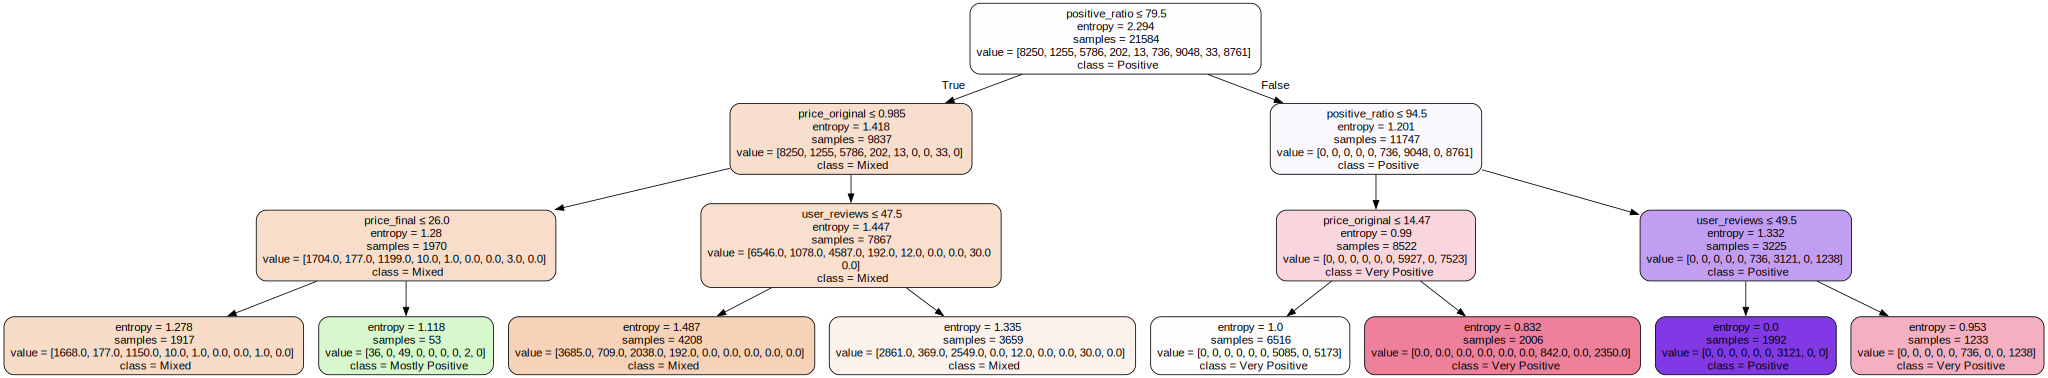

In [59]:
feature_names = X.columns
class_names = np.sort(np.unique(y)).astype(str)
plot_tree_classification(rf, feature_names, class_names)

In [60]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

In [61]:
predictionsOnTrainset = rf.predict(X_train)
predictionsOnTestset = rf.predict(X_test)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, y_train)
accuracyTest = calculate_accuracy(predictionsOnTestset, y_test)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.934954817509682
Accuracy on test set 0.9333452466047176


I am now going to do ti again, but with a for loop to see which max_depth + n_estimators combo is the best

In [62]:
results = []
amount_of_depths = 25
start_depths = 1
amount_of_estimators = 25
start_estimators = 1
for loop in range(start_depths,amount_of_depths +1):
    for loop2 in range(start_estimators,amount_of_estimators+1):
        print(f"calculating n_estimators: {loop2}, max_depth: {loop}")
        rf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=loop)
        rf.fit(X_train, y_train)
        feature_names = X.columns
        class_names = np.sort(np.unique(y)).astype(str)
        # plot_tree_classification(rf, feature_names, class_names)
        predictionsOnTrainset = rf.predict(X_train)
        predictionsOnTestset = rf.predict(X_test)
        accuracyTrain = calculate_accuracy(predictionsOnTrainset, y_train)
        accuracyTest = calculate_accuracy(predictionsOnTestset, y_test)
        print("Accuracy on training set " + str(accuracyTrain))
        print("Accuracy on test set     " + str(accuracyTest))
        print(f"difference at {loop}&{loop2} = {(accuracyTrain - accuracyTest)}")
        results.append({
            "max_depth": loop,
            "n_estimators": loop2,
            "accuracyTrain": accuracyTrain,
            "accuracyTest": accuracyTest,
            "difference": accuracyTrain - accuracyTest
        })


results.sort(key=lambda x: x["difference"])
df = pd.DataFrame(results)
df


calculating n_estimators: 1, max_depth: 1
Accuracy on training set 0.5529280600868443
Accuracy on test set     0.5471765546819156
difference at 1&1 = 0.005751505404928636
calculating n_estimators: 2, max_depth: 1
Accuracy on training set 0.5519598638657435
Accuracy on test set     0.5472361210388372
difference at 1&2 = 0.004723742826906241
calculating n_estimators: 3, max_depth: 1
Accuracy on training set 0.7639948362868207
Accuracy on test set     0.759947581605909
difference at 1&3 = 0.004047254680911716
calculating n_estimators: 4, max_depth: 1
Accuracy on training set 0.7639948362868207
Accuracy on test set     0.759947581605909
difference at 1&4 = 0.004047254680911716
calculating n_estimators: 5, max_depth: 1
Accuracy on training set 0.7024116887689238
Accuracy on test set     0.694305456278294
difference at 1&5 = 0.008106232490629806
calculating n_estimators: 6, max_depth: 1
Accuracy on training set 0.7639948362868207
Accuracy on test set     0.759947581605909
difference at 1&6 =

,max_depth,n_estimators,accuracyTrain,accuracyTest,difference
0,5,3,0.963355,0.963367,-0.000011
1,8,10,0.999237,0.999226,0.000012
2,5,1,0.991785,0.991661,0.000124
3,6,16,0.962328,0.962175,0.000153
4,9,20,1.000000,0.999821,0.000179
...,...,...,...,...,...
620,1,1,0.552928,0.547177,0.005752
621,1,8,0.551813,0.546045,0.005768
622,2,9,0.735272,0.728556,0.006716
623,2,24,0.733130,0.726114,0.007016


## findings

at 5 combinations, the accuracy of the test data is higher than the accuracy of the training data which is interesting.

I find it also interesting that the order of depth increasing doesn't mean the difference gets smaller nor bigger. it is a bit random (in my eyes)

I also find it interesting that more trees doesn't mean a bigger or smaller difference in the accuracy between the 2 datasets